In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("Video_Game_Sales.csv")

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


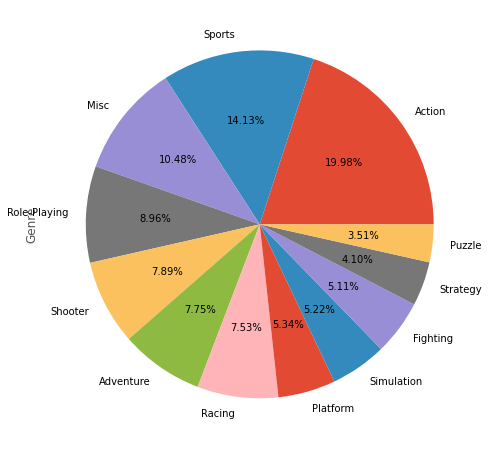

In [6]:
df['Genre'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (15,8))
plt.show()

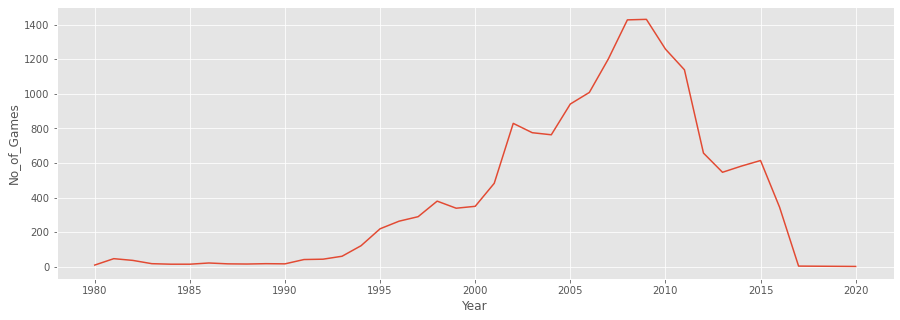

In [7]:
plt.figure(figsize=(15,5))
games = df.groupby(['Year']).count()['Name'].sort_values(ascending = False)
games = pd.DataFrame(games).reset_index()
games = games.rename(columns = {'Name':'No_of_Games'})
sns.lineplot(data=games, x=games['Year'], y=games['No_of_Games'])
plt.show()

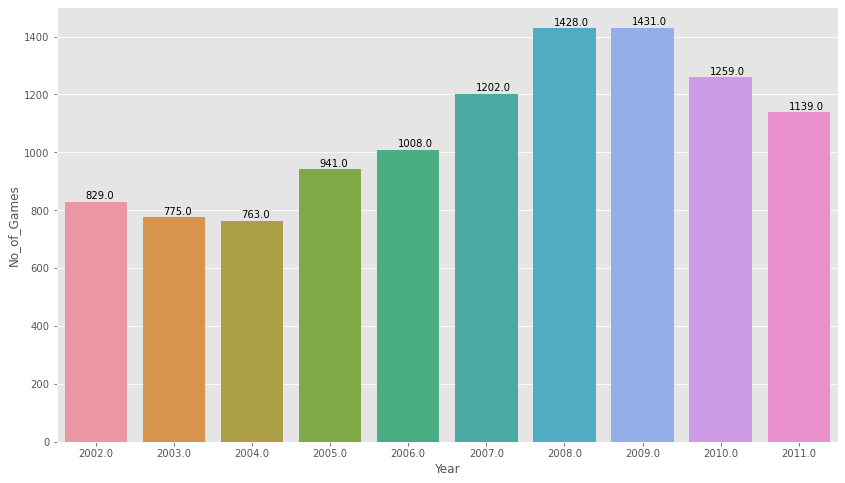

In [8]:
games = df.groupby(['Year']).count()['Name'].sort_values(ascending = False).head(10)
games = pd.DataFrame(games).reset_index()
games = games.rename(columns = {'Name':'No_of_Games'})
plt.figure(figsize=(14,8))
plot = sns.barplot(data=games, x=games['Year'], y=games['No_of_Games'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/3, p.get_height()+10))

In [9]:
top_sales_year = round(df.groupby(['Year']).sum()['Global_Sales'].sort_values(ascending = False).head(10),2)
top_sales_year = pd.DataFrame(top_sales_year).reset_index()
top_sales_year

,Year,Global_Sales
0,2008.0,678.90
1,2009.0,667.30
2,2007.0,611.13
3,2010.0,600.45
4,2006.0,521.04
5,2011.0,515.99
6,2005.0,459.94
7,2004.0,419.31
8,2002.0,395.52
9,2013.0,368.11


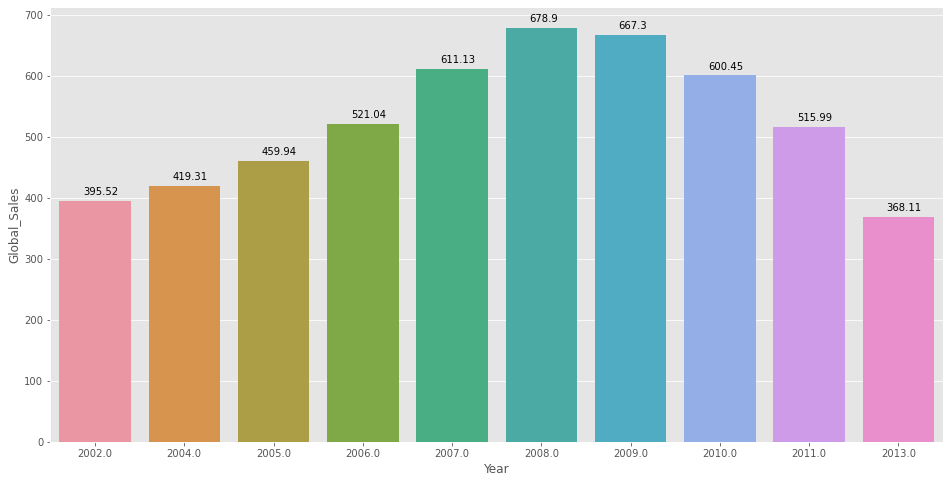

In [10]:
plt.figure(figsize=(16,8))
plot = sns.barplot(data=top_sales_year, x = top_sales_year['Year'], y = top_sales_year['Global_Sales'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/3, p.get_height()+10))

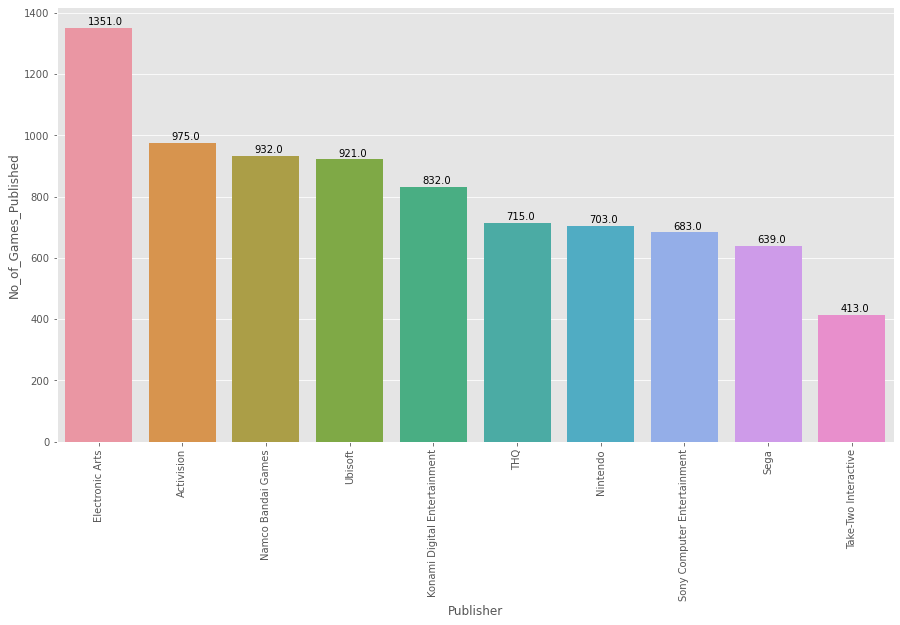

In [11]:
plt.figure(figsize=(15,8))
publisher = df.groupby(['Publisher']).count()['Rank'].sort_values(ascending = False).head(10)
publisher = pd.DataFrame(publisher).reset_index().rename(columns={'Rank':'No_of_Games_Published'})
plot = sns.barplot(data=publisher, x=publisher['Publisher'], y = publisher['No_of_Games_Published'])
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/3, p.get_height()+10))

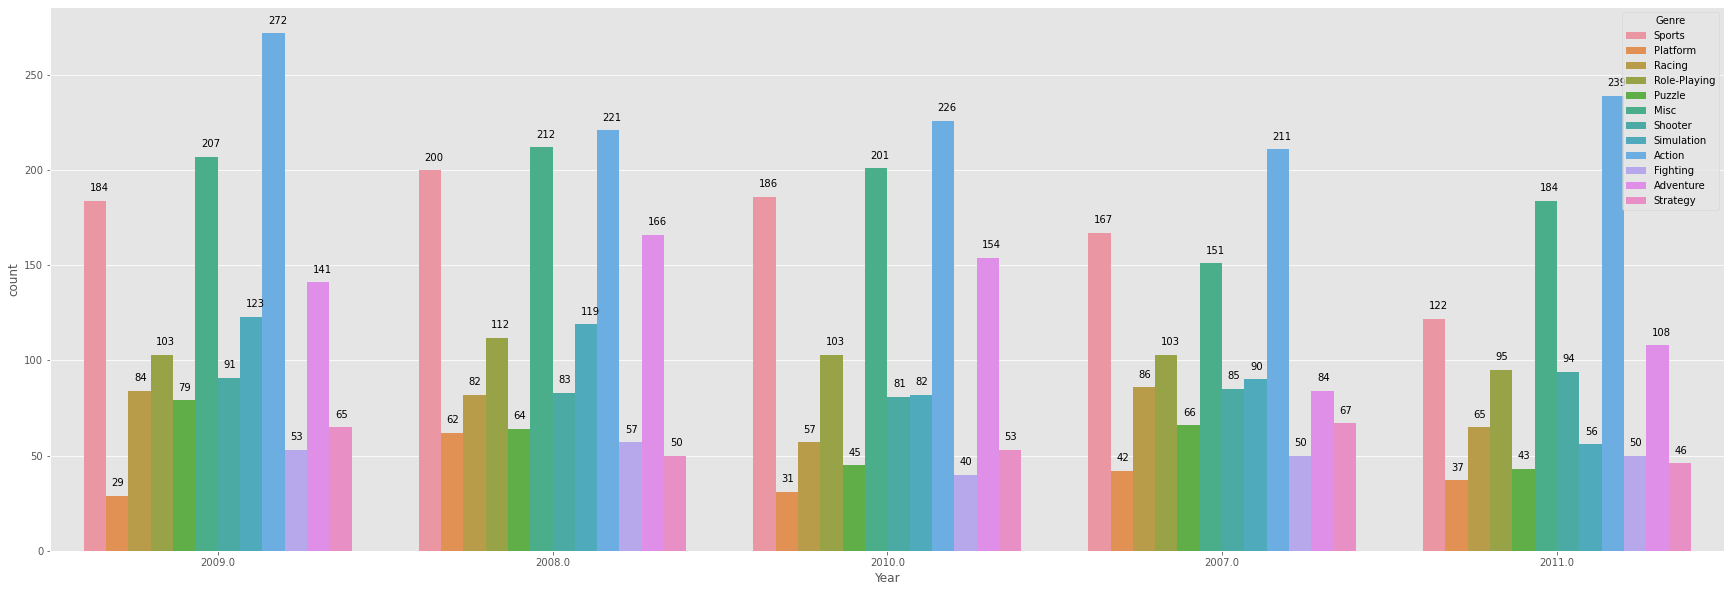

In [12]:
plt.figure(figsize=(30,10))
plot = sns.countplot(data=df, x=df['Year'], hue='Genre', order=df['Year'].value_counts().iloc[:5].index)
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/4, p.get_height()+5))

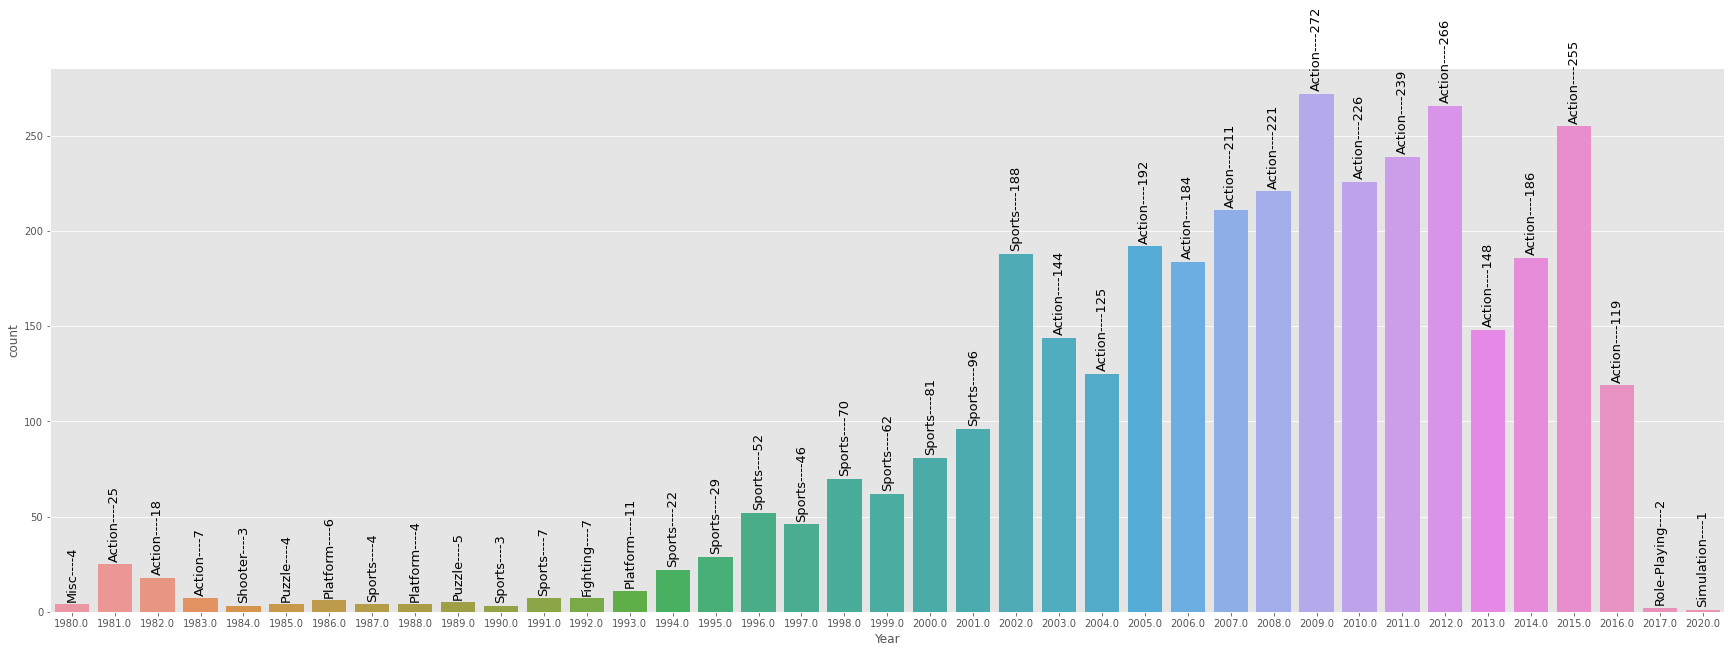

In [13]:
genre_per = df.groupby(['Year','Genre']).size().reset_index(name = 'count')
genre_per_max = genre_per.groupby(['Year'])['count'].transform('max')==genre_per['count']
year_max_genre = genre_per[genre_per_max].reset_index(drop = True)
year_max_genre = year_max_genre.drop_duplicates(subset = ['Year','count'], keep = 'last').reset_index(drop = True)
year_max_genre
genre = year_max_genre['Genre'].values

plt.figure(figsize = (30,10))
plot = sns.barplot(data=year_max_genre, x = 'Year', y = 'count')
index = 0
for value in year_max_genre['count'].values:
    plot.text(index, value + 3, str(genre[index] + '----' +str(value)), color='#000', size=13, rotation= 90, ha="center")
    index += 1

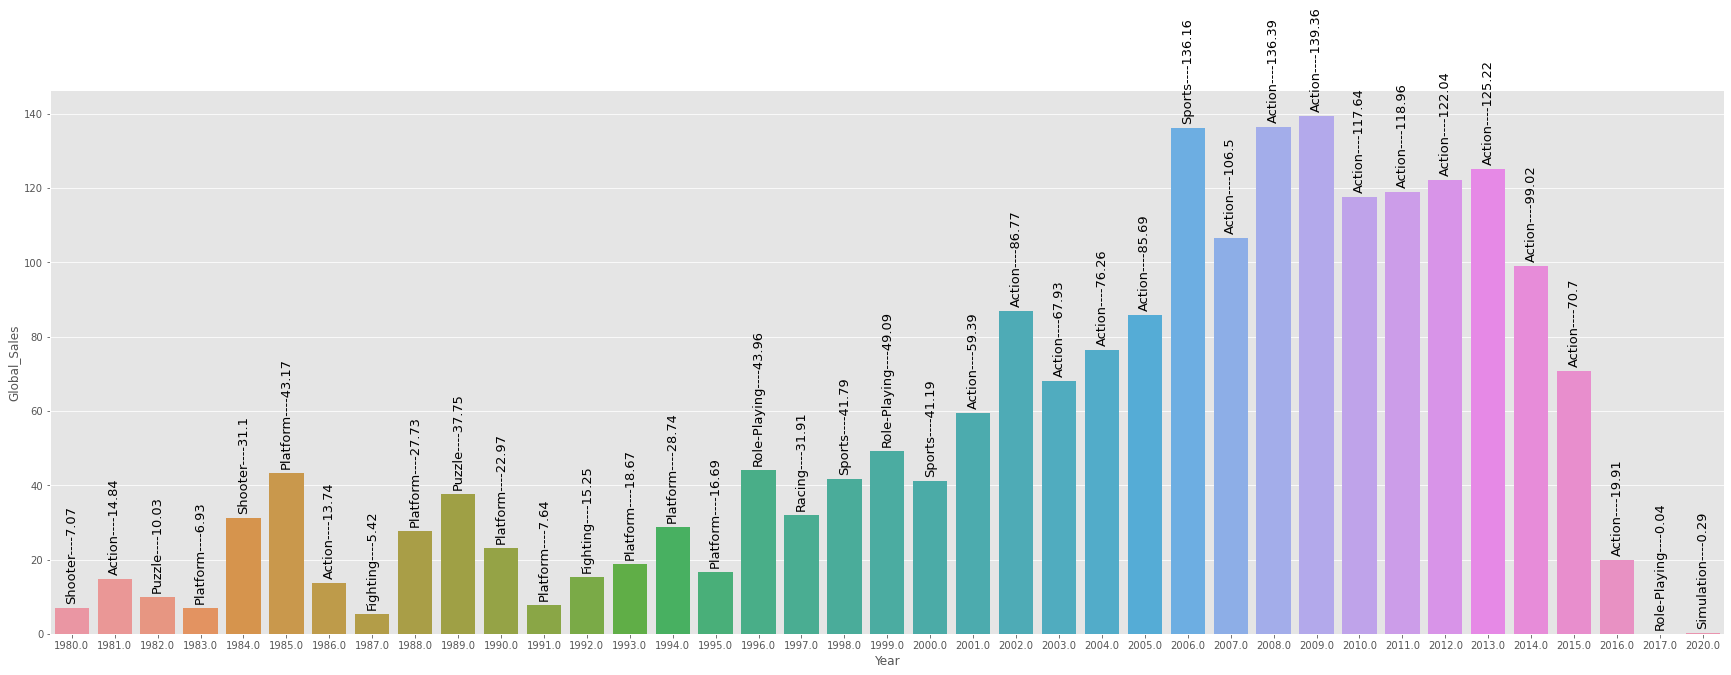

In [14]:
year_sale = df.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()
year_sales_a= year_sale.groupby(['Year'])['Global_Sales'].transform('max')==year_sale['Global_Sales']
year_sale_max = year_sale[year_sales_a].reset_index(drop = True)
year_sale_max

Sales = year_sale_max['Genre']

plt.figure(figsize = (30,10))
plot = sns.barplot(data=year_sale_max, x = 'Year', y = 'Global_Sales')
index = 0
for value in year_sale_max['Global_Sales']:
    plot.text(index, value + 2, str(Sales[index] + '----' +str(round(value,2))), color='#000', size=13, rotation= 90, ha="center")
    index += 1

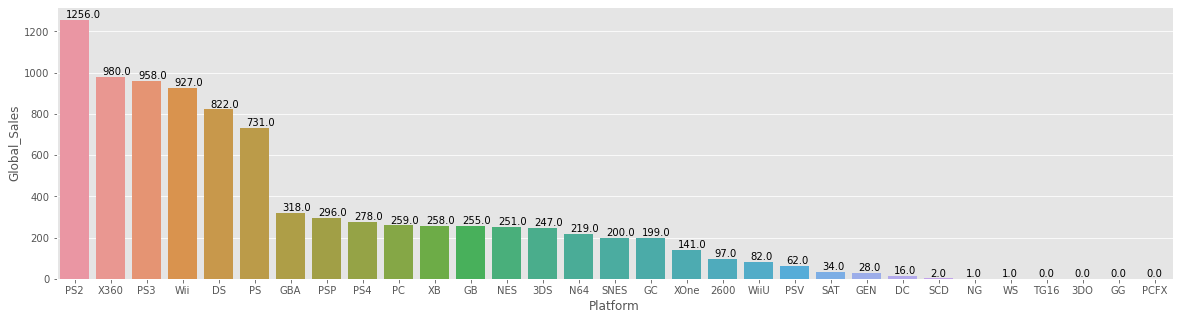

In [15]:
platform = pd.DataFrame(round(df.groupby(['Platform']).sum()['Global_Sales'].sort_values(ascending = False).reset_index()))
platform
plt.figure(figsize=(20,5))
plot = sns.barplot(data=platform, x='Platform', y='Global_Sales')
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/5, p.get_height()+10))